In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import utils
import importlib
from typing import List
importlib.reload(utils)

<module 'utils' from '/content/utils.py'>

# Loading dataset

In [4]:
with zipfile.ZipFile('Dataset.zip', 'r') as zip_ref:
  zip_ref.extractall('Data/')

In [5]:
import os
datasets = os.listdir('Data/')

# Concatenating dataset,
## Adding two columns, which containes number of points gained throught the season

In [6]:
# only important columns
columns = [ 'Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',  'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR','Season']

In [7]:
# Loading csv files with only important columns and adding two more

data = utils.load_csv(f"Data/{datasets[0]}", columns=columns)

for csv_file in datasets[1:]:
  temp = utils.load_csv(f"Data/{csv_file}",columns=columns)
  data = pd.concat([data,temp])

In [8]:
#checking shape of DataFrame
data.shape

(5949, 28)

In [9]:
data = data.sort_values(by='Date', ascending=True)
data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AC,HY,AY,HR,AR,Season,HomePoints,AwayPoints,HP_GAINED,AP_GAINED
0,F1,2021-08-06,20:00,Monaco,Nantes,1,1,D,1,1,...,2,0,0,0,0,2021/2022,1,1,1,1
1,F1,2021-08-07,16:00,Lyon,Brest,1,1,D,0,1,...,4,1,1,0,0,2021/2022,1,1,1,1
2,F1,2021-08-07,20:00,Troyes,Paris SG,1,2,A,1,2,...,1,1,4,0,0,2021/2022,0,3,0,3
6,F1,2021-08-08,14:00,St Etienne,Lorient,1,1,D,0,0,...,4,2,3,0,0,2021/2022,1,1,1,1
9,F1,2021-08-08,19:45,Montpellier,Marseille,2,3,A,2,0,...,11,0,1,0,0,2021/2022,0,3,0,3


# EDA

In [10]:
df = data.copy(deep=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5949 entries, 0 to 94
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Div         5949 non-null   object        
 1   Date        5949 non-null   datetime64[ns]
 2   Time        5949 non-null   object        
 3   HomeTeam    5949 non-null   object        
 4   AwayTeam    5949 non-null   object        
 5   FTHG        5949 non-null   int64         
 6   FTAG        5949 non-null   int64         
 7   FTR         5949 non-null   object        
 8   HTHG        5949 non-null   int64         
 9   HTAG        5949 non-null   int64         
 10  HTR         5949 non-null   object        
 11  HS          5949 non-null   int64         
 12  AS          5949 non-null   int64         
 13  HST         5949 non-null   int64         
 14  AST         5949 non-null   int64         
 15  HF          5949 non-null   int64         
 16  AF          5949 non-null   int

# EDA

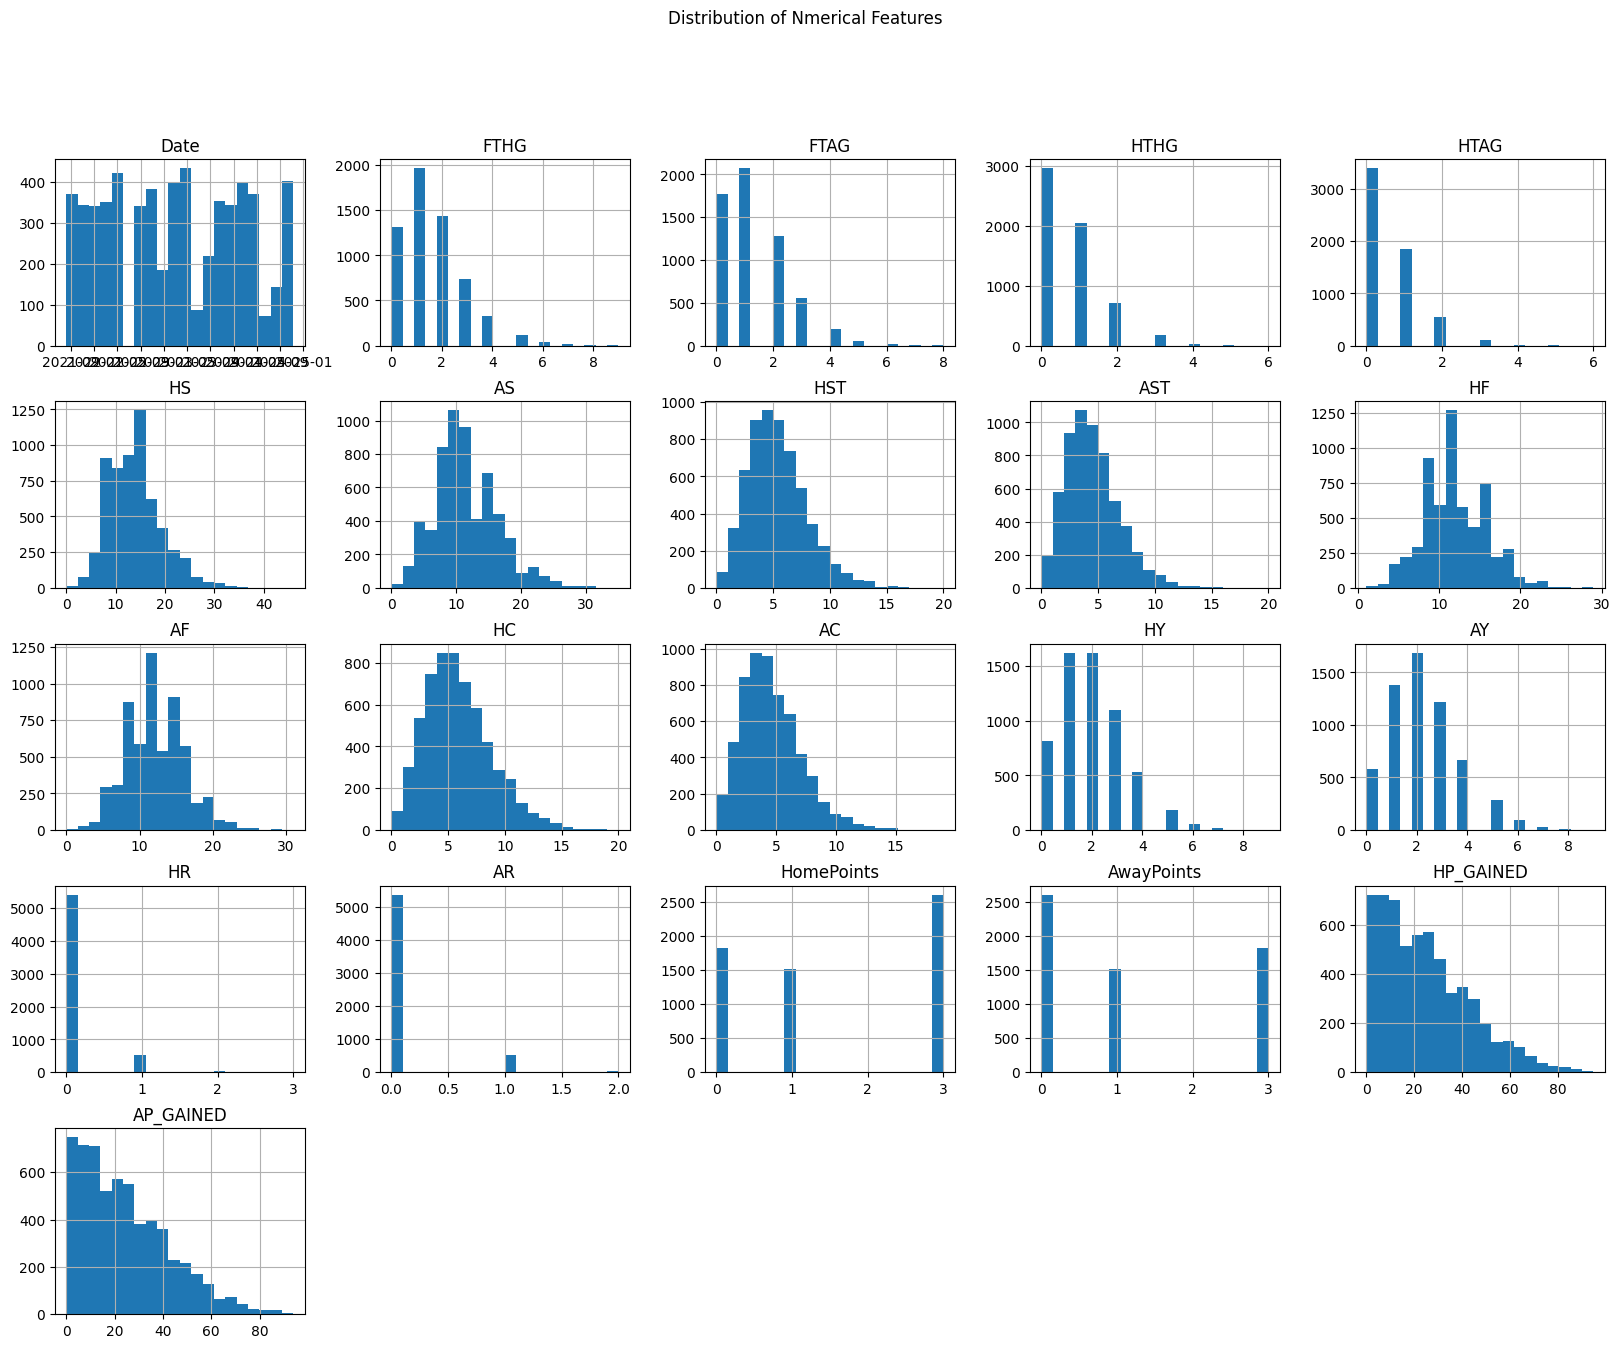

In [12]:
df.hist(bins=20,figsize=(20,15))
plt.suptitle('Distribution of Nmerical Features')
plt.show()

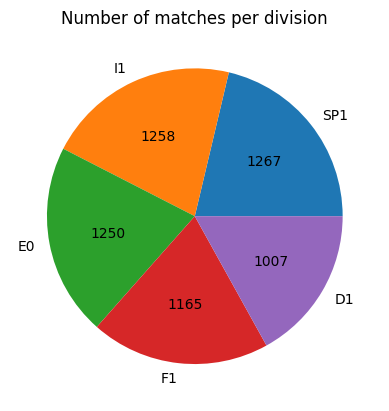

In [13]:
div_vc = df['Div'].value_counts()
div_vc.plot(kind='pie', autopct=lambda x : int(sum(div_vc) * x / 100))
plt.title('Number of matches per division')
plt.ylabel('')
plt.show()

Text(0.5, 0.98, 'Statistics per match')

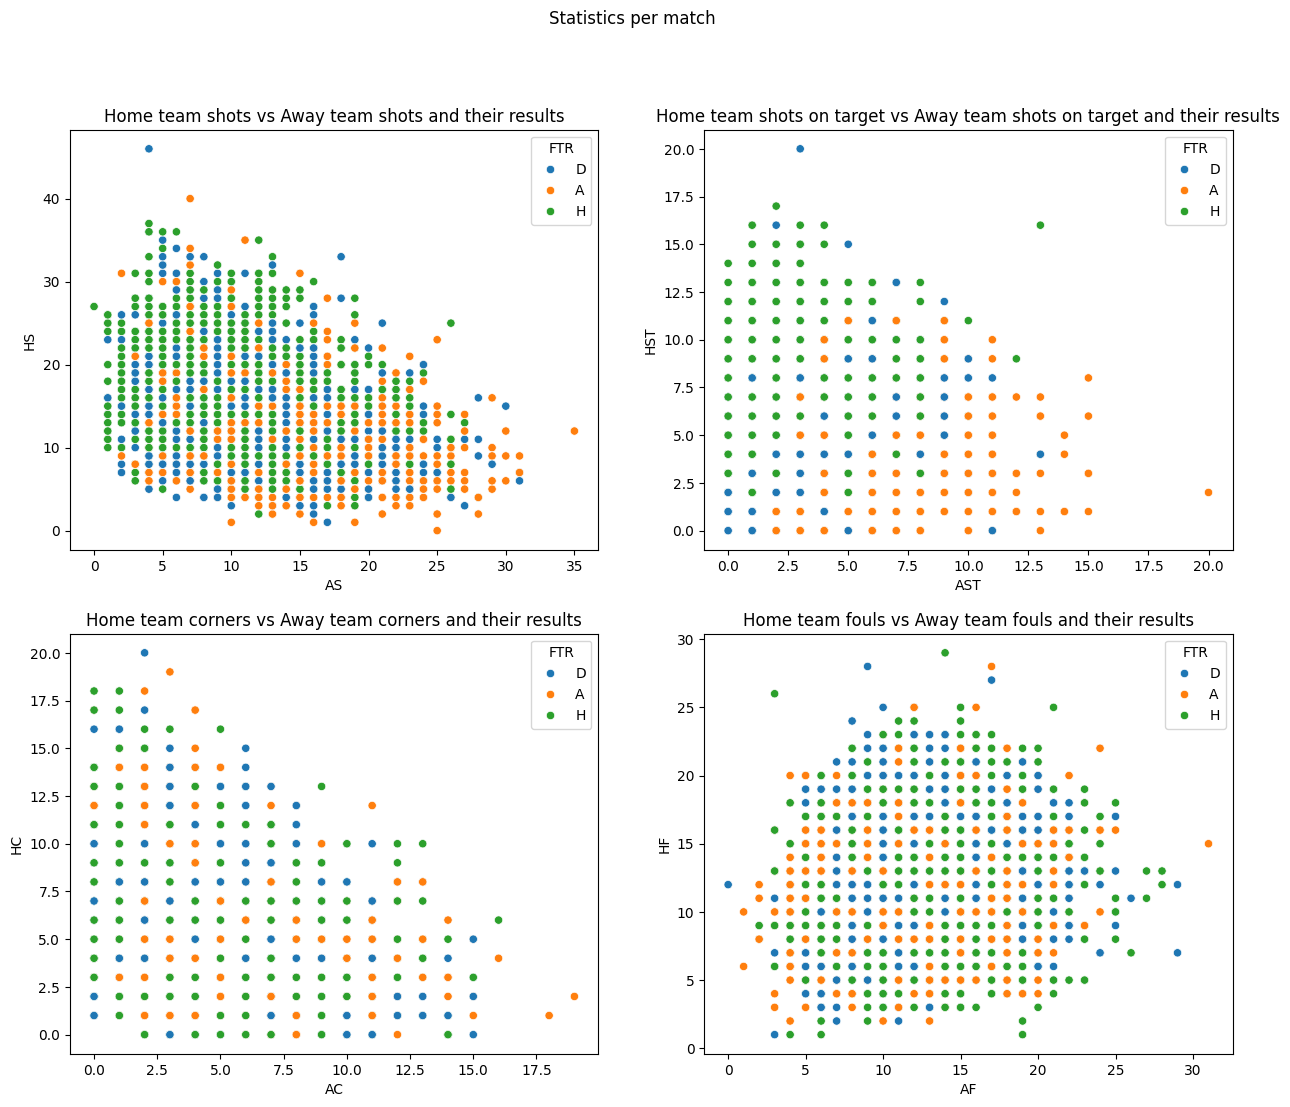

In [14]:
fig, axs = plt.subplots(2,2,figsize=(15,12))
sns.scatterplot(x=df['AS'], y=df['HS'], hue=df['FTR'],ax=axs[0,0])
axs[0,0].set_title('Home team shots vs Away team shots and their results')
sns.scatterplot(x=df['AST'], y=df['HST'], hue=df['FTR'],ax=axs[0,1])
axs[0,1].set_title('Home team shots on target vs Away team shots on target and their results')
sns.scatterplot(x=df['AC'], y=df['HC'], hue=df['FTR'],ax=axs[1,0])
axs[1,0].set_title('Home team corners vs Away team corners and their results')
sns.scatterplot(x=df['AF'], y=df['HF'], hue=df['FTR'],ax=axs[1,1])
axs[1,1].set_title('Home team fouls vs Away team fouls and their results')
plt.suptitle('Statistics per match')


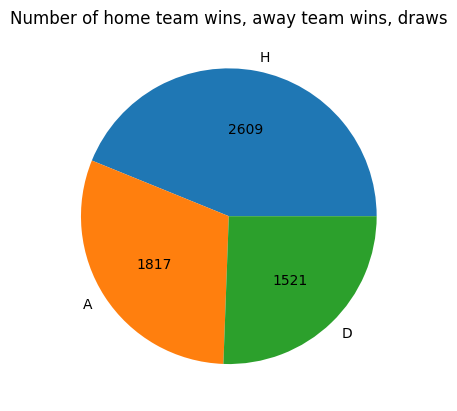

In [15]:
ftr_vc = df['FTR'].value_counts()
ftr_vc.plot(kind='pie',autopct=lambda x : int((sum(ftr_vc) * x) /100) )
plt.title('Number of home team wins, away team wins, draws')
plt.ylabel('')
plt.show()

## Replacing 'FTR' columns from H:1 , D:0, A:-1 to check correlation matrix

In [16]:
df['FTR'] = df['FTR'].replace({'H' : 1, 'A' : -1, 'D' : 0})

<ipython-input-16-70f618799777>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FTR'] = df['FTR'].replace({'H' : 1, 'A' : -1, 'D' : 0})


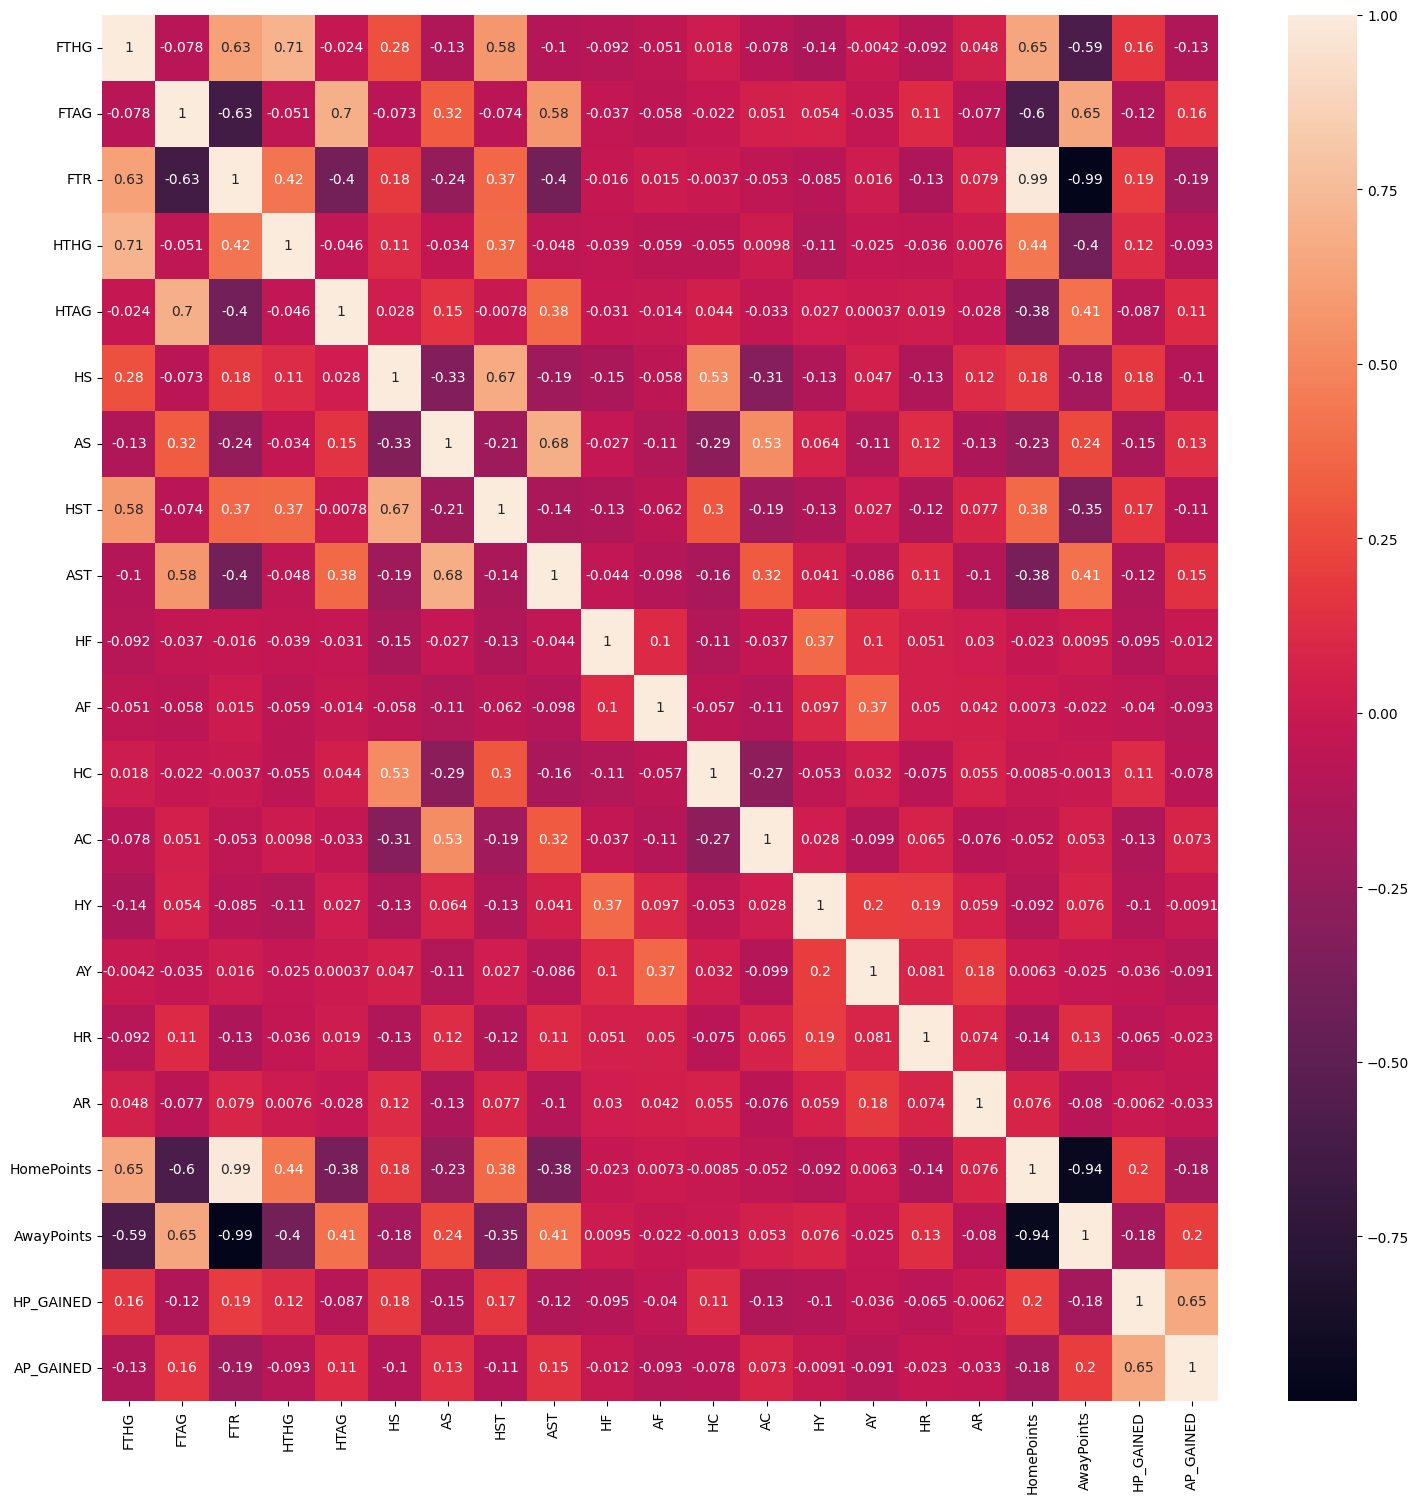

In [17]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

# Feature Extraction

## Calculating team statistics for at least last 4 games :
- teams form (Points gained in last 5 games)
- HS_5_LAST, AS_5_LAST ->  mean number of shots in last 5 games
- HST_5_LAST, AST_5_LAST ->  mean number of shots on target in last 5 games
- HG_5_LAST, AG_5_LAST -> mean number of goals scored in last 5 games
- HGL_5_LAST, AGL_5_LAST -> mean number of goals conceded in last 5 games
- AWR, ADR -> rate of matches wins and draws playing away
- HWR, HDR -> rate of matches wins and draws playing home

In [18]:
df[['HP_5_LAST','AP_5_LAST']] = df.apply(lambda row : utils.get_team_statictics_(row=row, df=df, columns=['HomePoints','AwayPoints']),axis=1)
df[['HS_5_LAST','AS_5_LAST']] = df.apply(lambda row : utils.get_team_statictics_(row=row, df=df, columns=['HS','AS']),axis=1)
df[['HST_5_LAST','AST_5_LAST']] = df.apply(lambda row : utils.get_team_statictics_(row=row, df=df, columns=['HST','AST']),axis=1)
df[['HG_5_LAST','AG_5_LAST']] = df.apply(lambda row : utils.get_team_statictics_(row=row, df=df, columns=['FTHG','FTAG']),axis=1)
df[['HGL_5_LAST','AGL_5_LAST']] = df.apply(lambda row : utils.get_team_statictics_(row=row, df=df, columns=['FTAG','FTHG']),axis=1)
df[['HWR','HDR','AWR','ADR']] = df.apply(lambda row : utils.get_team_rate(row=row, df=df,season=row['Season'], div=row['Div']),axis=1)

In [19]:
df.tail()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST_5_LAST,AST_5_LAST,HG_5_LAST,AG_5_LAST,HGL_5_LAST,AGL_5_LAST,HWR,HDR,AWR,ADR
95,F1,2024-11-10,16:00,Le Havre,Reims,0,3,-1,0,2,...,2.0,4.6,0.2,1.8,2.0,1.6,0.400,0.000,0.4,0.20
125,SP1,2024-11-10,17:30,Valladolid,Ath Bilbao,1,1,0,0,0,...,3.4,4.4,1.2,1.4,1.8,1.0,0.167,0.333,0.4,0.20
89,D1,2024-11-10,18:30,Heidenheim,Wolfsburg,1,3,-1,0,2,...,4.8,4.6,0.8,1.6,1.0,1.6,0.250,0.250,0.5,0.25
118,I1,2024-11-10,19:45,Inter,Napoli,1,1,0,1,1,...,7.2,4.4,2.4,1.4,1.2,0.8,0.667,0.167,0.6,0.20
94,F1,2024-11-10,14:00,Nice,Lille,2,2,0,0,1,...,5.2,3.8,1.0,1.6,0.6,0.4,0.500,0.500,0.6,0.20


In [20]:
df.iloc[:,28:].isnull().sum()

,0
HP_5_LAST,381
AP_5_LAST,381
HS_5_LAST,381
AS_5_LAST,381
HST_5_LAST,381
AST_5_LAST,381
HG_5_LAST,381
AG_5_LAST,381
HGL_5_LAST,381
AGL_5_LAST,381


## Dropping matches without statistics from previous matches
### These are matches from the beginning of the season

In [21]:
df.dropna(inplace=True)

In [22]:
sum(df.isnull().sum())

0

In [23]:
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST_5_LAST,AST_5_LAST,HG_5_LAST,AG_5_LAST,HGL_5_LAST,AGL_5_LAST,HWR,HDR,AWR,ADR
49,F1,2021-09-17,20:00,Strasbourg,Metz,3,0,1,3,0,...,3.2,4.0,1.4,1.2,2.2,2.0,0.333,0.333,0.0,0.500
50,F1,2021-09-18,16:00,Lens,Lille,1,0,1,0,0,...,5.8,4.4,2.0,1.4,1.4,2.2,0.000,1.000,0.0,0.667
51,F1,2021-09-18,20:00,St Etienne,Bordeaux,1,2,-1,0,1,...,4.2,4.0,1.0,1.0,1.8,2.4,0.000,1.000,0.0,0.500
53,F1,2021-09-19,14:00,Angers,Nantes,1,4,-1,1,3,...,3.4,4.2,1.8,0.6,0.4,1.0,1.000,0.000,0.0,0.500
58,F1,2021-09-19,19:45,Paris SG,Lyon,2,1,1,0,0,...,5.4,5.6,3.2,1.6,1.0,1.6,1.000,0.000,0.5,0.000


Text(0.5, 0.98, 'Statistics from previos games')

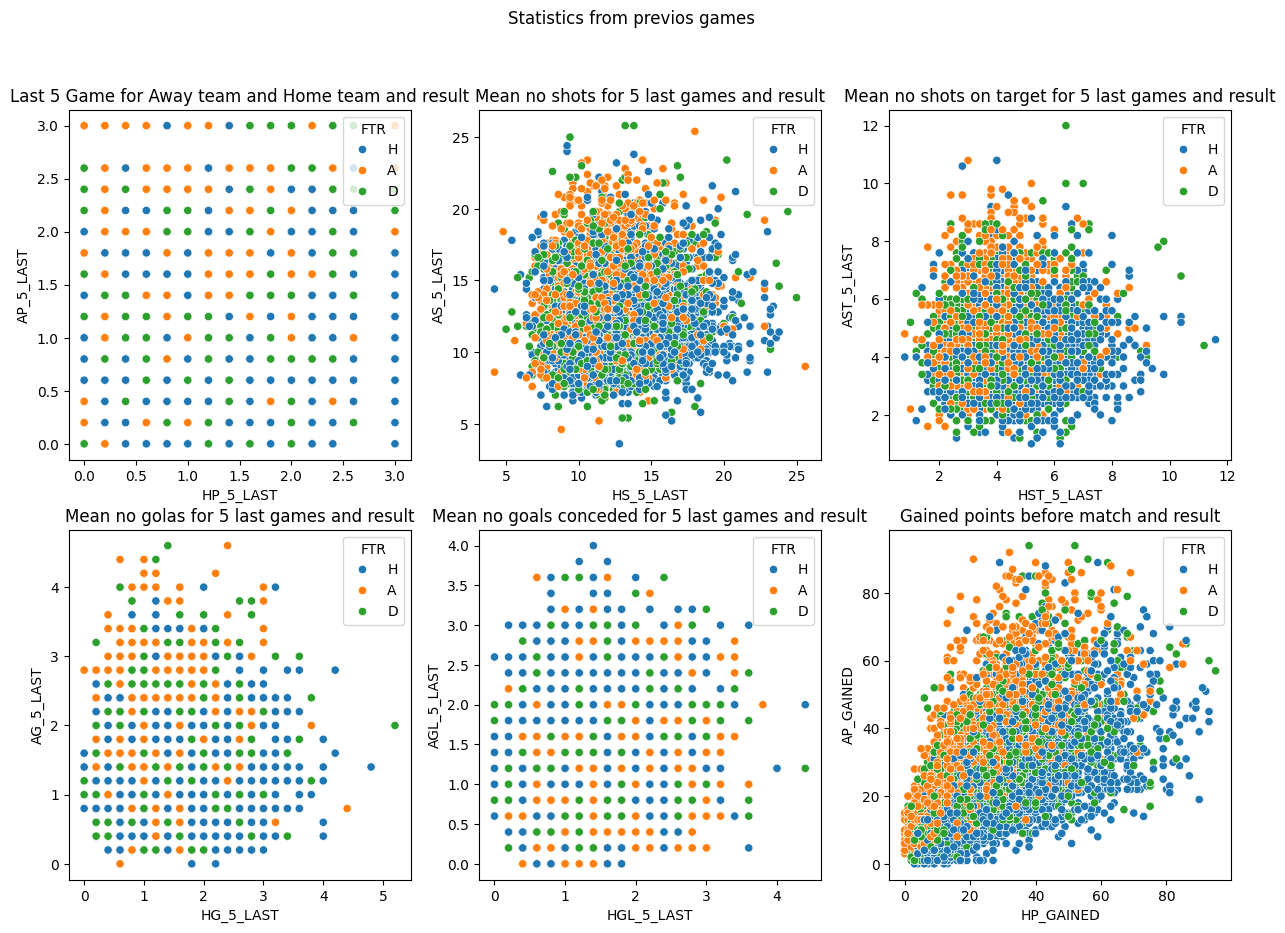

In [24]:
fig, axs = plt.subplots(2,3,figsize=(15,10))
sns.scatterplot(x=df['HP_5_LAST'], y=df['AP_5_LAST'],hue=df['FTR'].map({-1:'A', 0: 'D', 1:'H'}), ax=axs[0,0])
axs[0,0].set_title('Last 5 Game for Away team and Home team and result')
sns.scatterplot(x=df['HS_5_LAST'], y=df['AS_5_LAST'],hue=df['FTR'].map({-1:'A', 0: 'D', 1:'H'}), ax=axs[0,1])
axs[0,1].set_title('Mean no shots for 5 last games and result')
sns.scatterplot(x=df['HST_5_LAST'], y=df['AST_5_LAST'],hue=df['FTR'].map({-1:'A', 0: 'D', 1:'H'}), ax=axs[0,2])
axs[0,2].set_title('Mean no shots on target for 5 last games and result')
sns.scatterplot(x=df['HG_5_LAST'], y=df['AG_5_LAST'],hue=df['FTR'].map({-1:'A', 0: 'D', 1:'H'}), ax=axs[1,0])
axs[1,0].set_title('Mean no goals for 5 last games and result')
sns.scatterplot(x=df['HGL_5_LAST'], y=df['AGL_5_LAST'],hue=df['FTR'].map({-1:'A', 0: 'D', 1:'H'}), ax=axs[1,1])
axs[1,1].set_title('Mean no goals conceded for 5 last games and result')
sns.scatterplot(x=df['HP_GAINED'], y=df['AP_GAINED'], hue=df['FTR'].map({-1:'A', 0: 'D', 1:'H'}), ax=axs[1,2])
axs[1,2].set_title('Gained points before match and result')
plt.suptitle('Statistics from previos games')

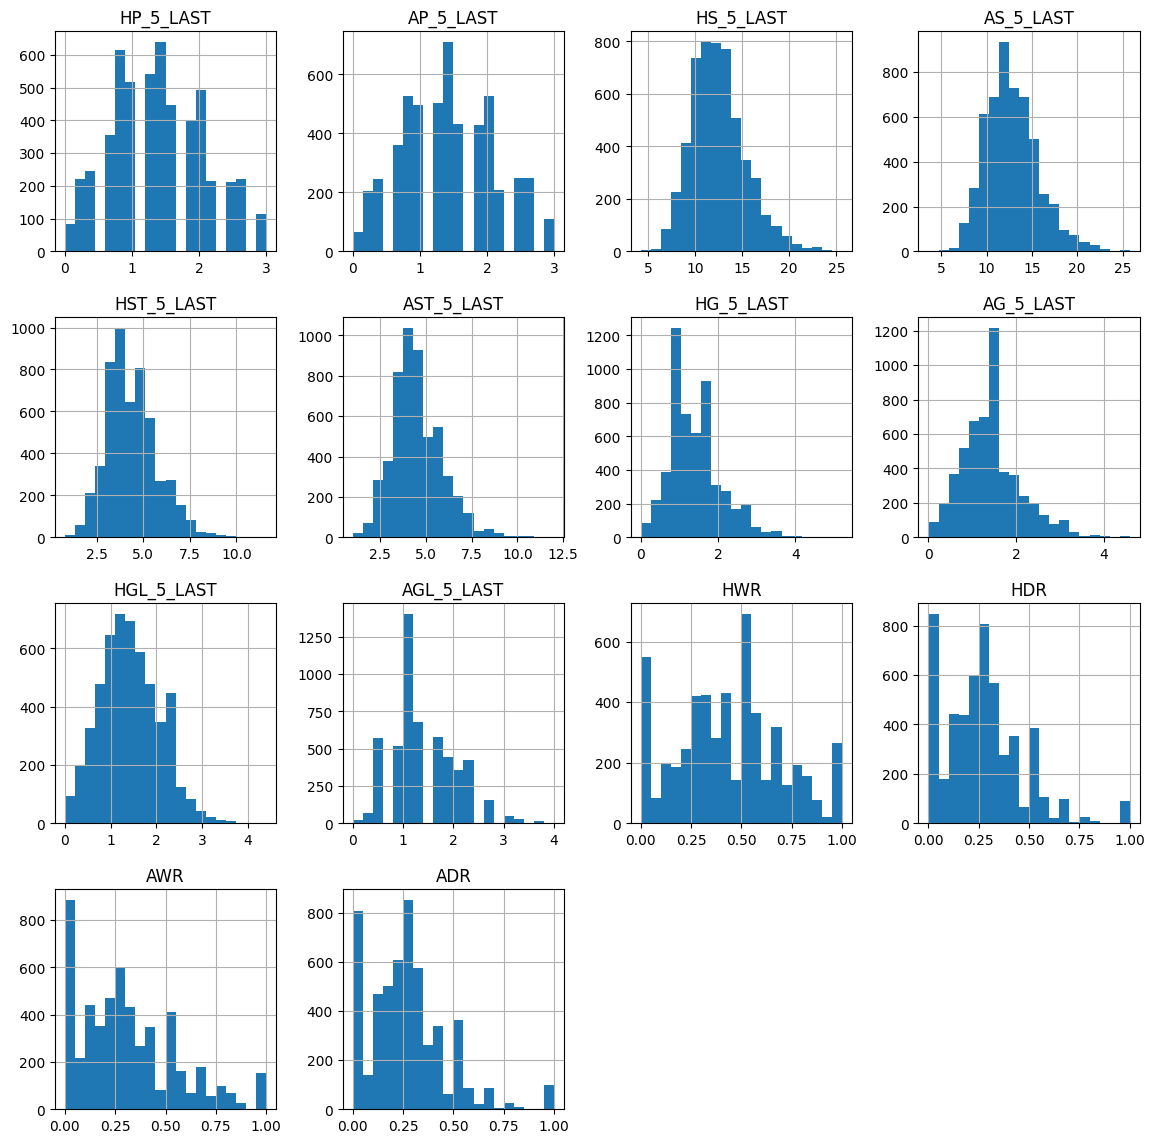

Text(0.5, 0.98, 'Distribution of the newly created columns')

<Figure size 640x480 with 0 Axes>

In [25]:
df.iloc[:,28:].hist(bins=20,figsize=(14,14))
plt.show()
plt.suptitle('Distribution of the newly created columns')

In [ ]:
df.head()

,index,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,HP_5_LAST,AP_5_LAST,HS_5_LAST,AS_5_LAST,HST_5_LAST,AST_5_LAST,HG_5_LAST,AG_5_LAST,HGL_5_LAST,AGL_5_LAST
174,71,F1,2021-09-25,20:00,Lyon,Lorient,1,1,0,0,...,10.0,8.0,74.0,48.0,34.0,22.0,11.0,6.0,7.0,6.0
178,72,F1,2021-09-25,20:00,Paris SG,Montpellier,2,0,1,1,...,15.0,8.0,70.0,70.0,28.0,26.0,14.0,10.0,4.0,7.0
180,70,F1,2021-09-25,18:00,Strasbourg,Lille,1,2,-1,0,...,10.0,7.0,53.0,45.0,20.0,19.0,9.0,6.0,5.0,6.0
204,73,F1,2021-09-26,12:00,Bordeaux,Rennes,1,1,0,0,...,5.0,6.0,66.0,64.0,22.0,20.0,8.0,7.0,12.0,6.0
210,74,F1,2021-09-26,14:00,Brest,Metz,1,2,-1,0,...,2.0,2.0,49.0,59.0,17.0,17.0,6.0,4.0,12.0,10.0


In [26]:
df_model = df.copy(deep=True)

In [27]:
df_model = df_model[['Div','Date','HomeTeam','AwayTeam','HP_5_LAST','AP_5_LAST','HS_5_LAST','AS_5_LAST','HST_5_LAST','AST_5_LAST','HG_5_LAST','AG_5_LAST','HGL_5_LAST','AGL_5_LAST','HP_GAINED','AP_GAINED','HWR','HDR','AWR','ADR','FTR']]

<Axes: >

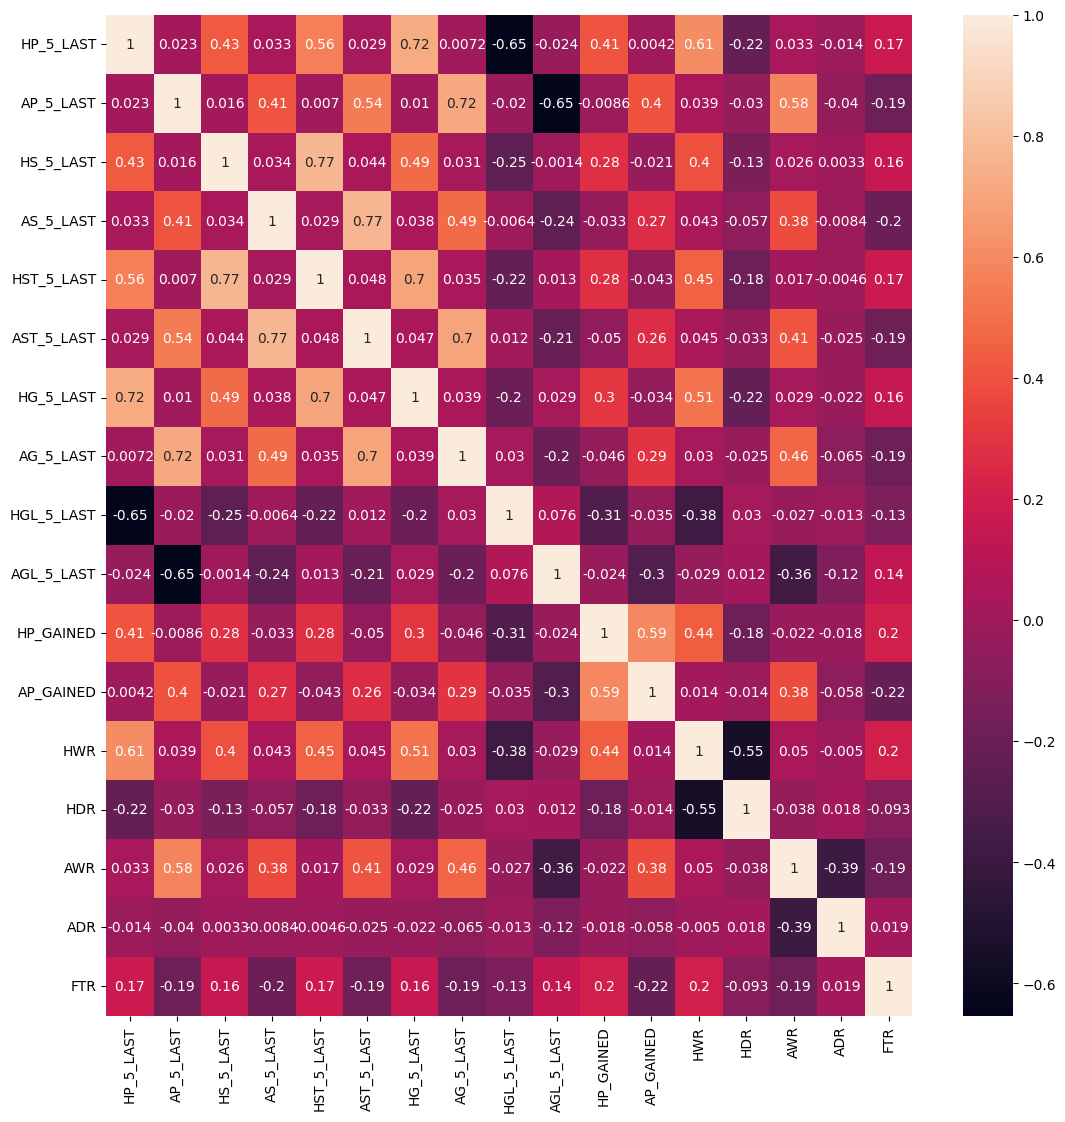

In [28]:
plt.figure(figsize=(13,13))
sns.heatmap(df_model.corr(numeric_only=True),annot=True)

In [29]:
df_model.tail()

,Div,Date,HomeTeam,AwayTeam,HP_5_LAST,AP_5_LAST,HS_5_LAST,AS_5_LAST,HST_5_LAST,AST_5_LAST,...,AG_5_LAST,HGL_5_LAST,AGL_5_LAST,HP_GAINED,AP_GAINED,HWR,HDR,AWR,ADR,FTR
95,F1,2024-11-10,Le Havre,Reims,0.6,1.2,9.0,15.6,2.0,4.6,...,1.8,2.0,1.6,9,17,0.400,0.000,0.4,0.20,-1
125,SP1,2024-11-10,Valladolid,Ath Bilbao,0.6,1.2,10.0,14.6,3.4,4.4,...,1.4,1.8,1.0,9,20,0.167,0.333,0.4,0.20,0
89,D1,2024-11-10,Heidenheim,Wolfsburg,0.8,1.2,16.4,12.4,4.8,4.6,...,1.6,1.0,1.6,10,12,0.250,0.250,0.5,0.25,-1
118,I1,2024-11-10,Inter,Napoli,2.6,2.4,18.6,12.8,7.2,4.4,...,1.4,1.2,0.8,25,26,0.667,0.167,0.6,0.20,0
94,F1,2024-11-10,Nice,Lille,1.8,2.2,13.2,11.2,5.2,3.8,...,1.6,0.6,0.4,17,19,0.500,0.500,0.6,0.20,0


In [30]:
df_model['DPS'] = df_model['Date'].apply(utils.start_season)

In [31]:
df_model.drop(columns=['Date'],inplace=True)

In [32]:
df_model.head(2)

,Div,HomeTeam,AwayTeam,HP_5_LAST,AP_5_LAST,HS_5_LAST,AS_5_LAST,HST_5_LAST,AST_5_LAST,HG_5_LAST,...,HGL_5_LAST,AGL_5_LAST,HP_GAINED,AP_GAINED,HWR,HDR,AWR,ADR,FTR,DPS
49,F1,Strasbourg,Metz,0.8,0.6,10.4,12.0,3.2,4.0,1.4,...,2.2,2.0,7,3,0.333,0.333,0.0,0.500,1,78
50,F1,Lens,Lille,1.8,1.0,13.6,12.2,5.8,4.4,2.0,...,1.4,2.2,12,5,0.000,1.000,0.0,0.667,1,79


In [33]:
X = df_model.drop(columns=['FTR'])
y = df_model['FTR']

In [34]:
y = y.replace({-1:1, 0:0, 1:2})

## Preprocessing data
### Spliting to 80% Train 20% Test
### Scaling the numerical data
### OneHotEncoding the categorical data

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_cols = list(X_train.select_dtypes(include=['int64','float64']).columns)
cat_cols = ['Div','HomeTeam','AwayTeam']

preprocessor = ColumnTransformer(
    transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(), cat_cols)
  ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


# Creating models for predictions

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

def model_evaluation(model, X_train, y_train, y_test, y_pred, model_clear):
  """
  Function to evaluate model using confusion matrix and cross validation
  """
  plt.figure(figsize=(6,6))
  sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, xticklabels=['Draw', 'Away', 'Home'], yticklabels=['Draw', 'Away', 'Home'], fmt='d')

  cross_val_res = cross_val_score(model_clear, X_train, y_train, cv=5)
  min_cross_val = np.min(cross_val_res)
  plt.title(f"Cross Validation : {min_cross_val}")
  plt.show()
  return min_cross_val


# XGB Classifier

In [83]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, jaccard_score, f1_score, log_loss

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3).fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)

## XGB Classifier - 56% Accuracy

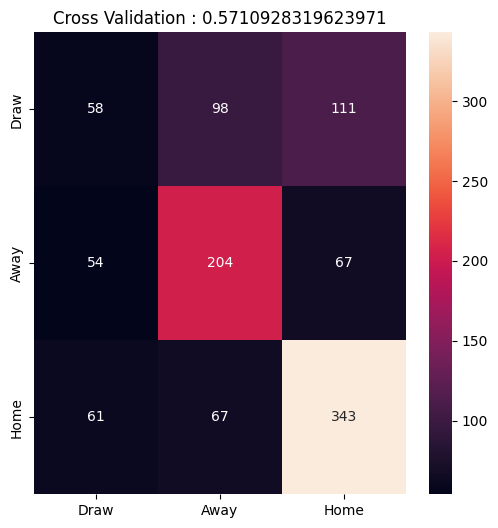

In [84]:
xgb_model_clear = xgb.XGBClassifier(objective='multi:softmax', num_class=3)
cross_val = model_evaluation(xgb_model,X_train,y_train,y_test,y_pred,xgb_model_clear)
results = pd.DataFrame([accuracy_score(y_test,y_pred),jaccard_score(y_test,y_pred,average='weighted'),f1_score(y_test,y_pred,average='weighted'),cross_val], columns=['XGB'], index=['Accuracy','Jaccard','F1','cross_val'])

In [85]:
results

,XGB
Accuracy,0.569144
Jaccard,0.399597
F1,0.552370
cross_val,0.571093


# Decision Tree Classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

y_pred = tree.predict(X_test)

## Decision Tree 48% Accuracy

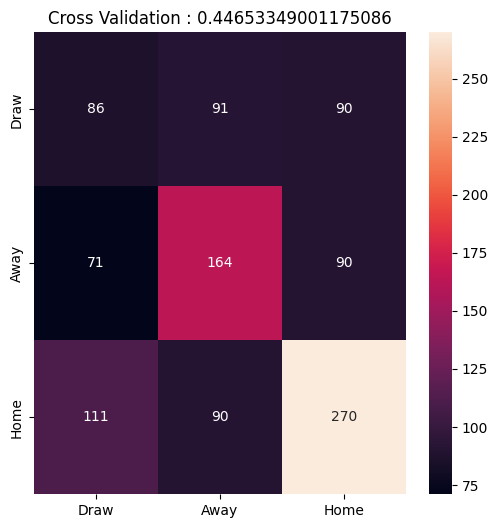

In [87]:
tree_clean = DecisionTreeClassifier(random_state=42)
cross_val = model_evaluation(tree,X_train,y_train,y_test,y_pred,tree_clean)
results['Tree'] = [accuracy_score(y_test,y_pred),jaccard_score(y_test,y_pred,average='weighted'),f1_score(y_test,y_pred,average='weighted'),cross_val]

In [88]:
results

,XGB,Tree
Accuracy,0.569144,0.489182
Jaccard,0.399597,0.330971
F1,0.552370,0.490216
cross_val,0.571093,0.446533


# Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=10, random_state=42).fit(X_train,y_train)

y_pred = forest.predict(X_test)

## Random Forest 51% Accuracy

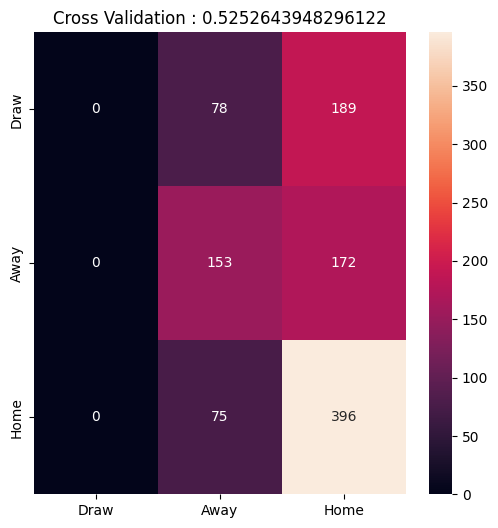

In [90]:
forest_clean = RandomForestClassifier(n_estimators=100, random_state=42)
cross_val = model_evaluation(forest,X_train,y_train,y_test,y_pred,forest_clean)
results['Forest'] = [accuracy_score(y_test,y_pred),jaccard_score(y_test,y_pred,average='weighted'),f1_score(y_test,y_pred,average='weighted'),cross_val]

In [91]:
results

,XGB,Tree,Forest
Accuracy,0.569144,0.489182,0.516463
Jaccard,0.399597,0.330971,0.308754
F1,0.552370,0.490216,0.434035
cross_val,0.571093,0.446533,0.525264


# SVM

In [124]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', random_state = 42).fit(X_train,y_train)

y_pred = svc.predict(X_test)

## SVM 55% Accuracy

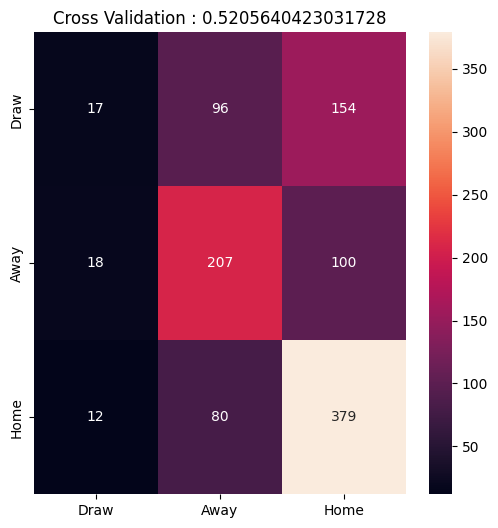

In [125]:
svc_clean = SVC(kernel='linear', decision_function_shape='ovr')
cross_val = model_evaluation(svc,X_train,y_train,y_test,y_pred,svc_clean)
results['SVC'] = [accuracy_score(y_test,y_pred),jaccard_score(y_test,y_pred,average='weighted'),f1_score(y_test,y_pred,average='weighted'),cross_val]

In [126]:
results

,XGB,Tree,Forest,SVC,KNN
Accuracy,0.569144,0.489182,0.516463,0.567262,0.523048
Jaccard,0.399597,0.330971,0.308754,0.372327,0.339153
F1,0.552370,0.490216,0.434035,0.510197,0.485801
cross_val,0.571093,0.446533,0.525264,0.520564,0.492941


# KNN

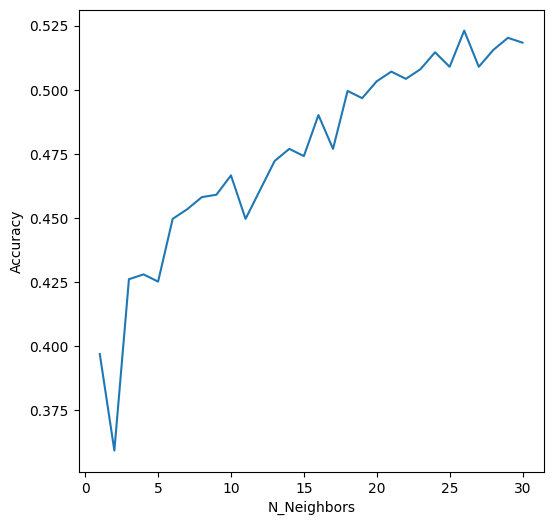

In [96]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_test = []

for i in range(1,31):
  knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
  accuracy_test.append(accuracy_score(y_test, knn.predict(X_test)))


plt.figure(figsize=(6,6))
plt.plot(range(1,31), accuracy_test)
plt.xlabel('N_Neighbors')
plt.ylabel("Accuracy")
plt.show()

In [99]:
knn = KNeighborsClassifier(n_neighbors=np.argmax(accuracy_test)+1).fit(X_train,y_train)
y_pred = knn.predict(X_test)

## KNN 45% Accuracy

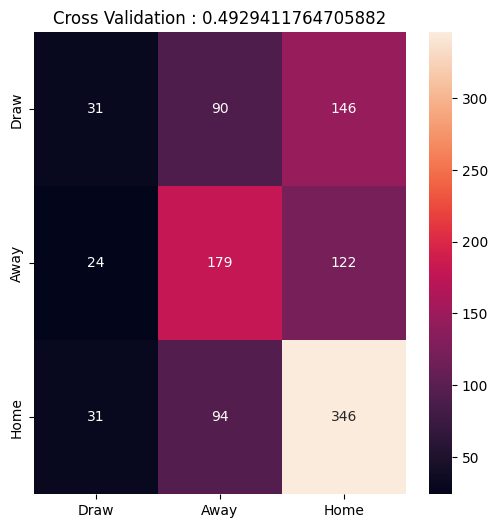

In [101]:
knn_clean = KNeighborsClassifier(n_neighbors=np.argmax(accuracy_test)+1)
cross_val = model_evaluation(knn,X_train,y_train,y_test,y_pred,knn_clean)
results['KNN'] = [accuracy_score(y_test,y_pred),jaccard_score(y_test,y_pred,average='weighted'),f1_score(y_test,y_pred,average='weighted'),cross_val]

In [102]:
results

,XGB,Tree,Forest,SVC,KNN
Accuracy,0.569144,0.489182,0.516463,0.559737,0.523048
Jaccard,0.399597,0.330971,0.308754,0.385045,0.339153
F1,0.552370,0.490216,0.434035,0.538441,0.485801
cross_val,0.571093,0.446533,0.525264,0.520564,0.492941


# Comparing Models

Text(0.5, 1.0, 'Cross Validation')

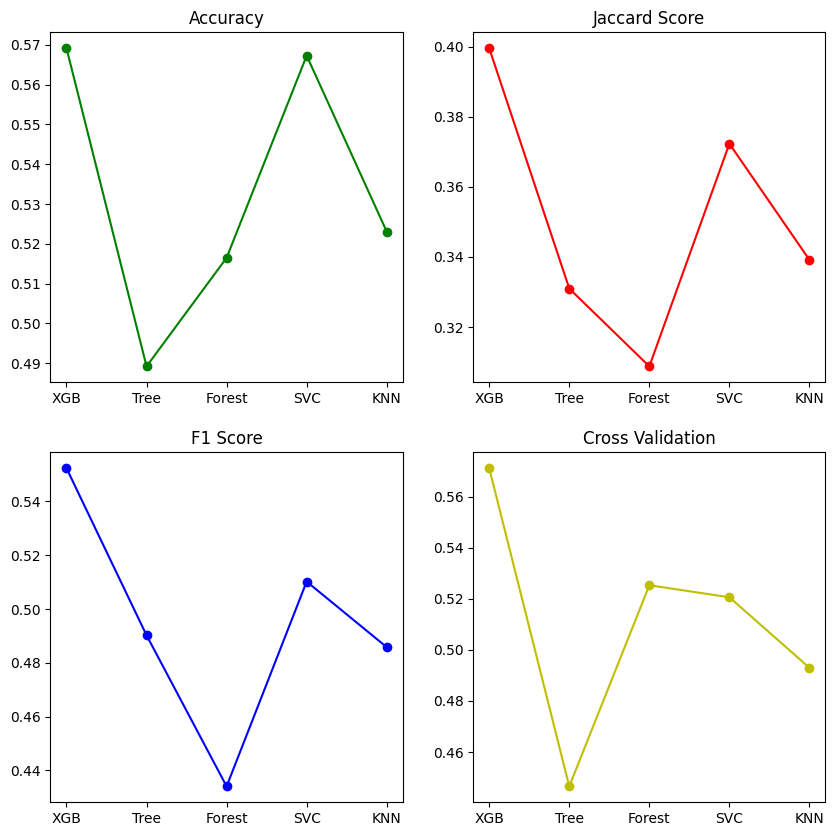

In [127]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].plot(results.loc['Accuracy'], c='g', marker='o')
axs[0,0].set_title('Accuracy')
axs[0,1].plot(results.loc['Jaccard'], c='r', marker='o')
axs[0,1].set_title('Jaccard Score')
axs[1,0].plot(results.loc['F1'], c='b', marker='o')
axs[1,0].set_title('F1 Score')
axs[1,1].plot(results.loc['cross_val'], c='y', marker='o')
axs[1,1].set_title('Cross Validation')

# Hyperparameter Tuning

## XGBClassifier

In [118]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.5, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [1, 5, 10, 15]
}



model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

xgb_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_iter=20, random_state=42)
xgb_search.fit(X_train,y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_class=3, num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.8,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [50, 100, 200, 300,
                                                         500],
                                        'reg_alpha': [0, 0.1, 1, 10],
                                        'reg_lambda': [1, 5, 10, 15],
                                        'subsample': [0.5, 0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [119]:
best_xgb = xgb.XGBClassifier(**xgb_search.best_params_, objective='multi:softmax', num_class=3, random_state=42).fit(X_train,y_train)

y_pred = best_xgb.predict(X_test)

best_models = pd.DataFrame([accuracy_score(y_test,y_pred), jaccard_score(y_test,y_pred,average='weighted'), f1_score(y_test,y_pred,average='weighted')], columns=['XGB'], index=['Accuracy', 'Jaccard', 'F1'])

In [120]:
best_models

,XGB
Accuracy,0.601129
Jaccard,0.414077
F1,0.559259


## SVC

In [131]:
from scipy.stats import expon

param_grid = {'kernel': ('linear', 'rbf','poly') ,
              'C':[0.1, 1, 5, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001, 0.0001],
              'degree' : [1,2,3,4,5,6]}



svc_search = RandomizedSearchCV(SVC(), param_grid, n_iter=20, scoring='accuracy', cv=5, verbose=1, random_state=42)
svc_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.1, 1, 5, 10, 100, 1000],
                                        'degree': [1, 2, 3, 4, 5, 6],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ('linear', 'rbf', 'poly')},
                   random_state=42, scoring='accuracy', verbose=1)

In [133]:
best_svc = SVC(**svc_search.best_params_).fit(X_train, y_train)

y_pred = best_svc.predict(X_test)

best_models['SVC'] = [accuracy_score(y_test,y_pred), jaccard_score(y_test,y_pred,average='weighted'), f1_score(y_test,y_pred,average='weighted')]
best_models

,XGB,SVC
Accuracy,0.601129,0.573848
Jaccard,0.414077,0.366678
F1,0.559259,0.494220


<Figure size 600x600 with 0 Axes>

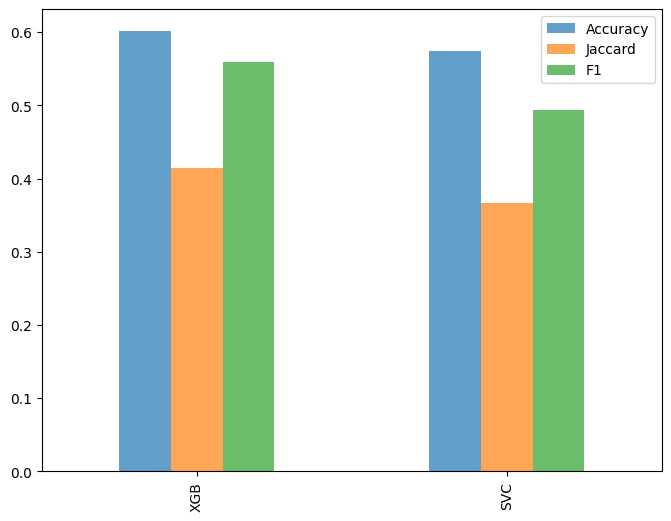

In [141]:
plt.figure(figsize=(6,6))

best_models.T.plot(kind='bar', alpha=0.7, figsize=(8,6))

plt.legend()
plt.show()